In [1]:
import piplite
await piplite.install('seaborn')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

In [3]:
#Car Sale Linear Regression

In [6]:
raw_data = pd.read_csv('12 practical example 1.csv')

In [7]:
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [8]:
#Preprocessing

In [9]:
#Explore the descriptive statistics of the variables

In [10]:
raw_data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [13]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [14]:
#Determining the variables of interest

In [15]:
data = raw_data.drop(['Model'], axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [16]:
#Dealing with missing values

In [17]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [18]:
#Remove dataset from missing value : rule have to <5% of the observations

In [19]:
#Remove null Price and EngineV

In [20]:
data_no_mv = data.dropna(axis=0)

In [22]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [23]:
#Exploring the PDF's

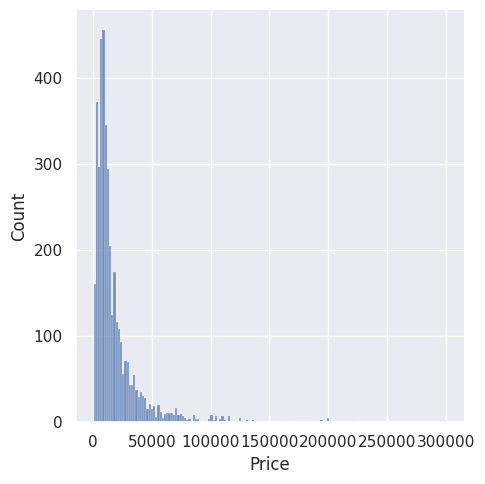

In [24]:
sns.displot(data_no_mv['Price'])

In [25]:
#From the graph and the descriptive we know that there is few outliars in Price dataset

In [27]:
#Remove outliars from top 1% of observations of Price features

In [29]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


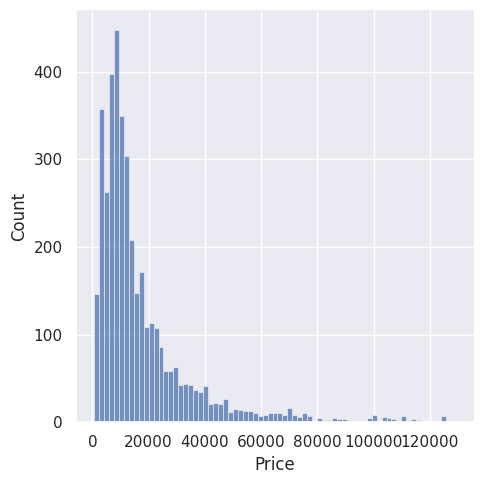

In [30]:
sns.displot(data_1['Price'])

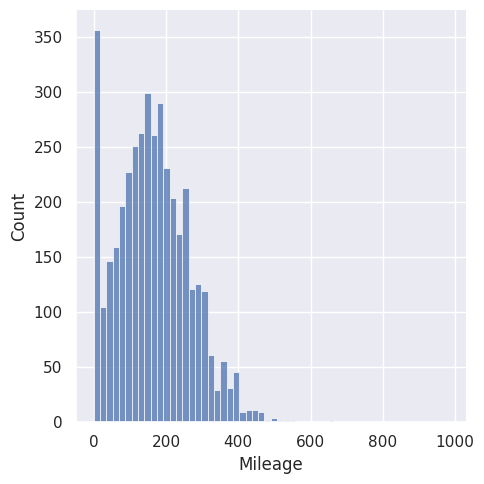

In [31]:
sns.displot(data_no_mv['Mileage'])

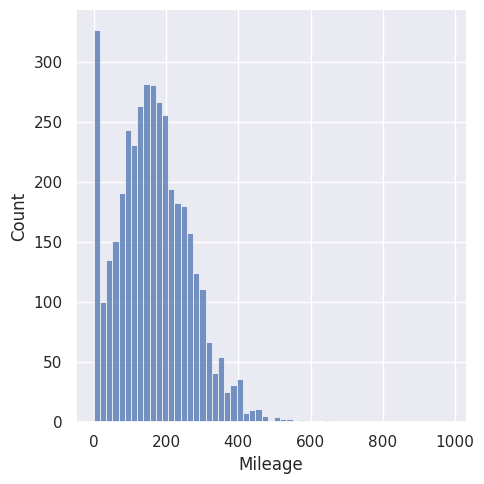

In [32]:
sns.displot(data_1['Mileage'])

In [34]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]
data_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


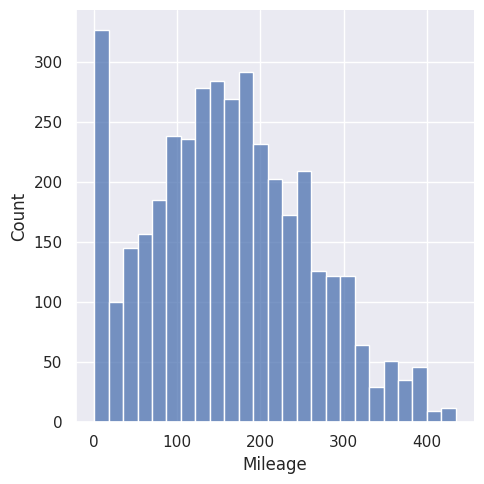

In [35]:
sns.displot(data_2['Mileage'])

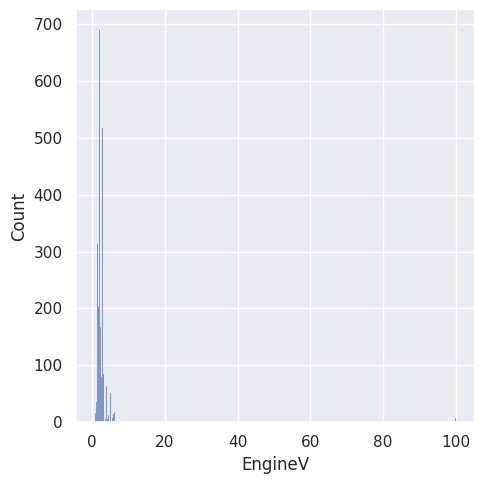

In [36]:
sns.displot(data_no_mv['EngineV'])

In [37]:
data_3 = data_2[data_2['EngineV']<6.5]

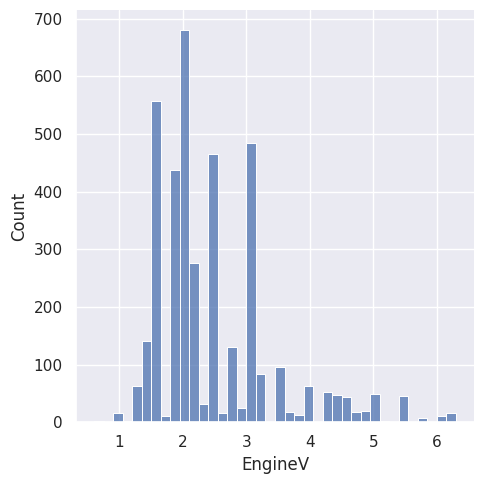

In [38]:
sns.displot(data_3['EngineV'])

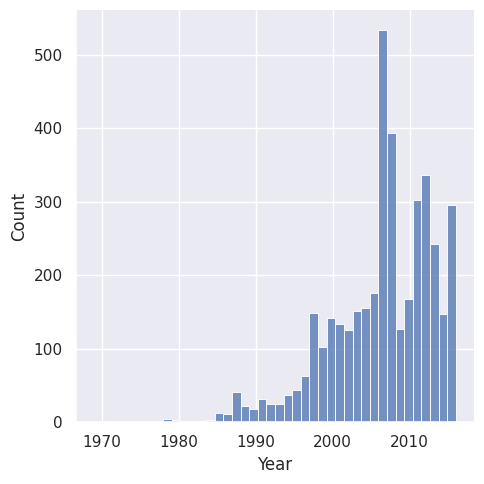

In [39]:
sns.displot(data_no_mv['Year'])

In [40]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

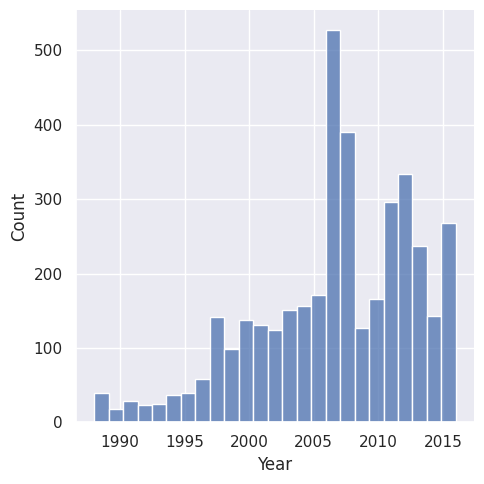

In [41]:
sns.displot(data_4['Year'])

In [43]:
data_cleaned = data_4.reset_index(drop=True)

In [45]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


In [46]:
#Checking the OLS assumptions

Text(0.5, 1.0, 'Price and Mileage')

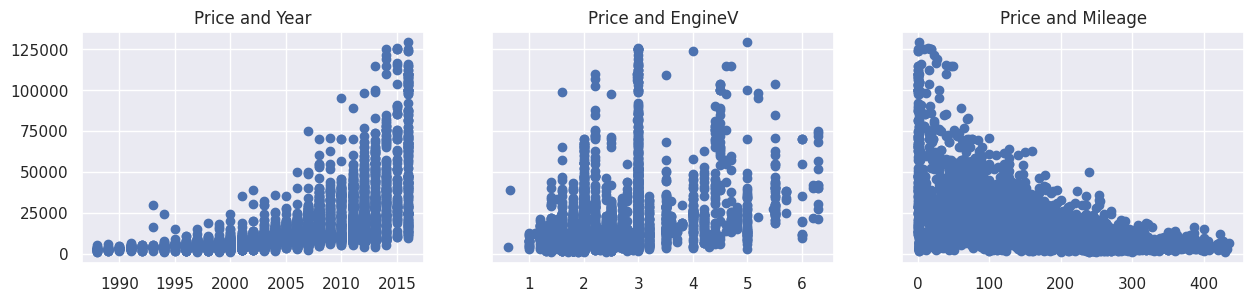

In [48]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')

In [49]:
#The pattern is not linear regression --> Transform one or more variables

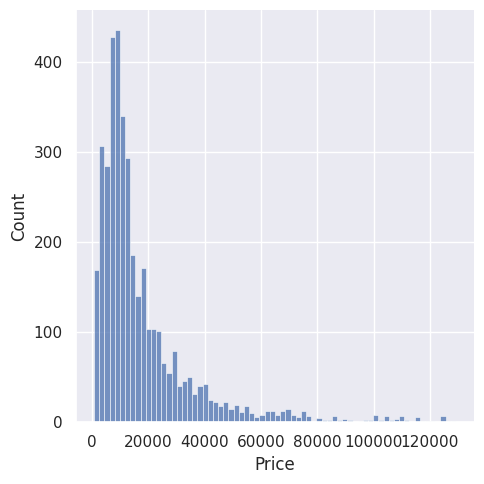

In [50]:
sns.displot(data_cleaned['Price'])

In [51]:
#The pattern is exponensial --> Apply log transformation to deal with exponensial distribution

In [52]:
#Relaxing the assumptions

In [53]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log price'] = log_price

Text(0.5, 1.0, 'Log Price and Mileage')

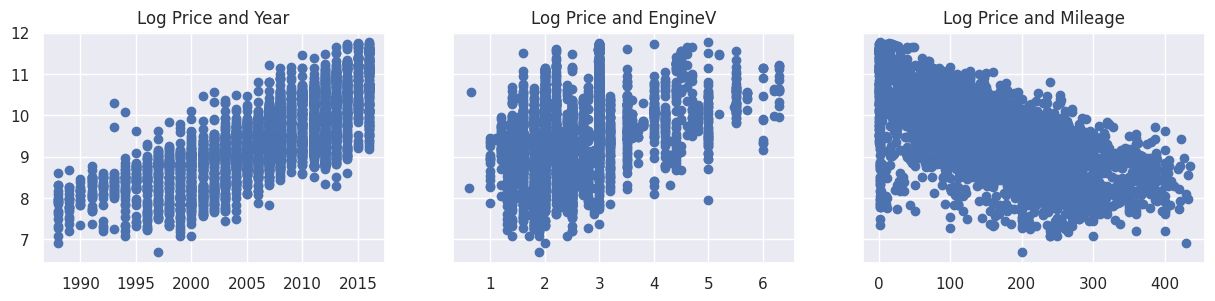

In [54]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['log price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log price'])
ax3.set_title('Log Price and Mileage')

In [55]:
#The distribution pattern transform to linear pattern

In [56]:
data_cleaned = data_cleaned.drop(['Price'], axis=1)

In [57]:
#The problem is the pattern look multicollinearity

In [58]:
#Dealing with multicolinearity

In [59]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log price'], dtype=object)

In [60]:
#One of best ways to check multicolinearity is VIF (Variance Inflation Factor)

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

In [63]:
vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [65]:
#Rules --> VIF = 1 : No Multicollinearity, 1<VIF<5 : perfectly okay, VIF > 10 : unacceptable

In [66]:
data_no_multicollinearity = data_cleaned.drop(['Year'], axis=1)

In [67]:
data_no_multicollinearity.describe(include = 'all')

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log price
count,3867,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,6,NaN,NaN,4,2,NaN
top,Volkswagen,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,1467,NaN,NaN,1807,3505,NaN
mean,NaN,NaN,160.542539,2.450440,NaN,NaN,9.415703
std,NaN,NaN,95.633291,0.949366,NaN,NaN,0.876616
min,NaN,NaN,0.000000,0.600000,NaN,NaN,6.684612
25%,NaN,NaN,91.000000,1.800000,NaN,NaN,8.881836
50%,NaN,NaN,157.000000,2.200000,NaN,NaN,9.367344
75%,NaN,NaN,225.000000,3.000000,NaN,NaN,9.985068


In [68]:
#Create Dummy Variables